In [6]:
import h5py
import scipy.io as io
from PIL import Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from tqdm import tqdm

from matplotlib import cm as CM
#from image import *
#%reload_ext autoreload        <------------— comment out 
#%autoreload 0                 <------------— comment out
%matplotlib inline

In [7]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [8]:
root = os.path.join(os.getcwd(),'ShanghaiTech')
print(root)

C:\Users\mohit\MINI PROJ\ShanghaiTech


In [9]:
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_B_train,part_B_test]

In [10]:
# List of all image paths

img_paths = []
for path in tqdm(path_sets):
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  5.18it/s]


716


In [11]:
from scipy import spatial
i = 0
for img_path in tqdm(img_paths):
        
    
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img= plt.imread(img_path)
    
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
           k[int(gt[i][1]),int(gt[i][0])]=1
    
    # generate density map
    k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground_truth')
    
    with h5py.File(file_path, 'w') as hf:
           hf['density'] = k

 15%|███████████▉                                                                  | 110/716 [44:04<4:07:03, 24.46s/it]

KeyboardInterrupt: 

In [ ]:
file_path = os.path.join(os.getcwd(),img_paths[15].replace('.jpg','.h5').replace('images','ground_truth') )
print(file_path)

In [5]:
gt_file = h5py.File(file_path,'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
print("Sum = " ,np.sum(groundtruth))
print(file_path)

NameError: name 'file_path' is not defined

C:\Users\mohit\MINI PROJ\ShanghaiTech\part_B/train_data\ground_truth\IMG_121.h5


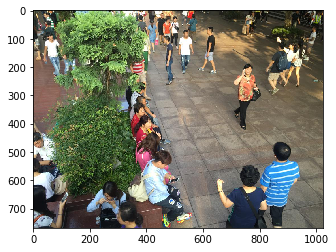

In [29]:
# Image corresponding to the ground truth
img = Image.open(file_path.replace('.h5','.jpg').replace('ground_truth','images'))
plt.imshow(img)
print(file_path)


In [30]:
import h5py
import numpy as np

arr = np.random.randn(1000)

with h5py.File('/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_A/train_data/ground/IMG_183.h5', 'w') as f:
    dset = f.create_dataset("default", data=arr)

OSError: Unable to create file (unable to open file: name = '/home/rana/mypython/crowd_counting_analysis/keras_solution/CSRNet_keras_master/CSRNet_keras_master/ShanghaiTech/part_A/train_data/ground/IMG_183.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [31]:
os.getcwd()

'C:\\Users\\mohit\\MINI PROJ'

In [32]:
len(gt)

113

In [33]:
print(k)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [7.3202764e-06 7.3320216e-06 7.3424007e-06 ... 1.7773458e-05
  1.7572180e-05 1.7370006e-05]
 [7.1530799e-06 7.1645568e-06 7.1746990e-06 ... 1.7488357e-05
  1.7290360e-05 1.7091483e-05]
 [6.9883831e-06 6.9995958e-06 7.0095048e-06 ... 1.7205335e-05
  1.7010592e-05 1.6814985e-05]]


In [34]:
pts = np.array(list(zip(np.nonzero(k)[1].ravel(), np.nonzero(k)[0].ravel())))

In [35]:
pts.shape

(562318, 2)

In [36]:
i=int(0)
for pt in pts:
    print(pt)
    i+=1
    if i==50:
        break

[790  40]
[791  40]
[792  40]
[793  40]
[794  40]
[795  40]
[796  40]
[797  40]
[798  40]
[799  40]
[800  40]
[801  40]
[802  40]
[803  40]
[804  40]
[805  40]
[806  40]
[807  40]
[808  40]
[809  40]
[810  40]
[811  40]
[812  40]
[813  40]
[814  40]
[815  40]
[816  40]
[817  40]
[818  40]
[819  40]
[820  40]
[821  40]
[822  40]
[823  40]
[824  40]
[825  40]
[826  40]
[827  40]
[828  40]
[829  40]
[830  40]
[831  40]
[832  40]
[833  40]
[834  40]
[835  40]
[836  40]
[837  40]
[838  40]
[839  40]
